### Import Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree, ensemble, model_selection, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

### Import Datasets

In [4]:
# features
x_train = pd.read_csv('training_set.csv')
x_test = pd.read_csv('testing_set.csv')

# labels
y_train = pd.read_csv('training_labels.csv')
y_test = pd.read_csv('testing_labels.csv')

print(x_train.columns)
print(x_test.columns)
print(y_train.columns)
print(y_test.columns)

Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_area_sqm', 'floor_range', 'sentiment'],
      dtype='object')
Index(['district', 'street', 'propertyType', 'remaining_lease', 'school',
       'hawkercentre', 'supermarkets', 'Bus Stops Nearby', 'crime_number',
       'latitude', 'longitude', 'floor_area_sqm', 'floor_range', 'sentiment'],
      dtype='object')
Index(['price'], dtype='object')
Index(['price'], dtype='object')


In [5]:
x_train.head(2)

,district,street,propertyType,remaining_lease,school,hawkercentre,supermarkets,Bus Stops Nearby,crime_number,latitude,longitude,floor_area_sqm,floor_range,sentiment
0,3,1664,6,78.75,24,16,7,0,193.285714,1.295995,103.803682,110.0,5,0.123678
1,18,1374,4,71.92,26,4,14,0,163.857143,1.373332,103.956317,122.0,1,0.077219


### Summary of Results
*Goal: Low RMSE, Low MAE, R2 close to 1, High Adjusted R2*, Low MAPE, Low SMAPE
    
Conclusions:
1. Random Forest better performance
2. For random forest, using Grid Search helped us in finding better estimators to improve the model slightly
3. For decision tree, using Grid Search did not help us to find better estimators (dk why? and the adjusted r2 for the model w grid search is negaative? huh? confused)

### Define function for MAPE and sMAPE

In [6]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def adjusted_r2(r2, n, p):
    result = 1-((1-r2)*((n-1)/(n-p-1)))
    return result

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def smape(y_true, y_pred):
    return 1/len(y_true) * np.sum(2 * np.abs(y_pred.squeeze()-y_true.squeeze()) / (np.abs(y_true.squeeze()) + np.abs(y_pred.squeeze()))*100)

### Decision Tree

#### (a) Basic Decision Tree with Default Parameters

[525800. 717200. 400000. ... 285000. 250000. 415000.]
training mse: 576926634.9985657, testing mse: 147097340252.58655
training rmse: 24019.297137896556, testing rmse: 383532.71079868346
training mae: 3730.394368578732, testing mae: 76545.03377033497
training R2: 0.999787644783206, testing R2: 0.9315697086310817
training adjusted R2: 0.999787643018271, testing adjusted R2: 0.9315645892855764
training mape: 0.4807289647660674, testing mape: 6.374305047160059
training smape: 0.4787405746558657, testing smape: 6.269135922750572


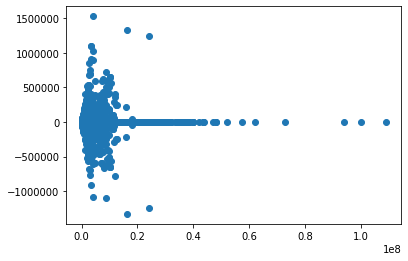

In [11]:
# train model
dt = tree.DecisionTreeRegressor()
dt.fit(x_train,y_train)

# make predictions on test set
y_pred_train = dt.predict(x_train)
y_pred = dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

# original_train_adj_r_squared = 1 - (1-r2_score(y_train,y_pred_train))*(len(y_pred_train)-1)/(len(y_pred_train)-y_train.shape[1]-1)
# original_test_adj_r_squared = 1 - (1-r2_score(y_test,y_pred))*(len(y_pred)-1)/(len(y_pred)-y_test.shape[1]-1)
n1 = len(y_pred_train)
p1 = y_train.shape[1]
train_adj_r_squared = adjusted_r2(train_r_squared, n1, p1)
n2 = len(y_pred)
p2 = y_test.shape[1]
test_adj_r_squared = adjusted_r2(test_r_squared, n2, p2)
# X=training label
# y=predicted i.e. y_pred_train
# 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_pred_train.squeeze() # fitted value
y_axis = y_pred_train.squeeze()- y_train.squeeze() # residual
plt.scatter(x_axis,y_axis) 

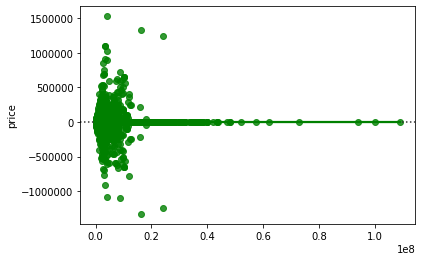

In [13]:
# vicki's residual plot: sns.residplot(y_pred_train.reshape(-1), y_train, lowess= True, color="g")
sns.residplot(x_axis, y_axis, lowess=True, color="g")

In [ ]:
dt.get_params(deep=True)

#### (b) Decision Tree using Best Estimators from Grid Search
- did 2 tests to kinda see which one better

In [ ]:
# test 1: best parameter is 'max_leaf_nodes': [200,400,600,800], 'min_samples_split': [7,12,15,20]

In [ ]:
params = {'max_features': [1,2,3,4,5], 'min_samples_split': [7,12,15,20,25]}
gsearch_dt = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), 
                          params, 
                          scoring = 'r2',
                          verbose=1, 
                          cv=3, 
                          n_jobs=-1)
gsearch_dt.fit(x_train, y_train)
print('best score:', gsearch_dt.best_score_)
print('best parameters: ', gsearch_dt.best_params_)
print('best estimators: ', gsearch_dt.best_estimator_)

In [ ]:
# make predictions on test set
y_pred_train = gsearch_dt.predict(x_train)
y_pred = gsearch_dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-gsearch_dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-gsearch_dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_test.squeeze() # fitted value
y_axis = y_test.squeeze()- y_pred.squeeze() # residual
plt.scatter(x_axis,y_axis) 

# [350000. 368000. 370000. ... 443000. 700000. 330000.]
# training mse: 6.082366888803413e-24, testing mse: 157758759744.53165
# training rmse: 2.466245504568313e-12, testing rmse: 397188.5695038714
# training mae: 1.3061783434841964e-14, testing mae: 78282.53707872861
# training R2: 1.0, testing R2: 0.936556848348264
# training adjusted R2: 1.0, testing adjusted R2: 0.9312662771703689
# training mape: 4.610041212297163e-19, testing mape: 6.390628811775515
# training smape: 4.610041212297164e-19, testing smape: 6.320467211747645

In [ ]:
# test 2: best parameter is 'min_samples_split': [7,12,15,20,25]

In [ ]:
params = {'min_samples_split': [7,12,15,20,25]}
gsearch_dt = GridSearchCV(tree.DecisionTreeRegressor(random_state=42), 
                          params, 
                          scoring = 'r2',
                          verbose=1, 
                          cv=3, 
                          n_jobs=-1)
gsearch_dt.fit(x_train, y_train)
print('best score:', gsearch_dt.best_score_)
print('best parameters: ', gsearch_dt.best_params_)
print('best estimators: ', gsearch_dt.best_estimator_)

In [ ]:
# make predictions on test set
y_pred_train = gsearch_dt.predict(x_train)
y_pred = gsearch_dt.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-gsearch_dt.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-gsearch_dt.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_test.squeeze() # fitted value
y_axis = y_test.squeeze()- y_pred.squeeze() # residual
plt.scatter(x_axis,y_axis) 

### Random Forest

#### (a) Basic Random Forest with Default Parameters

In [ ]:
# train model
rforest = ensemble.RandomForestRegressor()
rforest.fit(x_train,y_train)

# make predictions on test set
y_pred_train = rforest.predict(x_train)
y_pred = rforest.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-rforest.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-rforest.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_test.squeeze() # fitted value
y_axis = y_test.squeeze()- y_pred.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [ ]:
rforest.get_params(deep=True)

#### (b) Random Forest using Best Estimators from Grid Search
- did 2 tests to kinda see which one better

In [ ]:
# test 1: best parameter is 150

In [ ]:
params = {'n_estimators': [10,50,100,150]}
grid_search_cv = GridSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1)
grid_search_cv.fit(x_train, y_train)
print('best score:', grid_search_cv.best_score_)
print('best parameters: ', grid_search_cv.best_params_)
print('best estimators: ', grid_search_cv.best_estimator_)

In [ ]:
# make predictions on test set
y_pred_train = grid_search_cv.predict(x_train)
y_pred = grid_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-grid_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-grid_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training mape: {}, testing mape: {}".format(train_mape, test_mape))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_test.squeeze() # fitted value
y_axis = y_test.squeeze()- y_pred.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [ ]:
# test 2: best parameter is 150

In [ ]:
params = {'n_estimators': [100,150,200,250]}
grid_search_cv = GridSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1)
grid_search_cv.fit(x_train, y_train)
print('best score:', grid_search_cv.best_score_)
print('best parameters: ', grid_search_cv.best_params_)
print('best estimators: ', grid_search_cv.best_estimator_)

In [ ]:
# make predictions on test set
y_pred_train = grid_search_cv.predict(x_train)
y_pred = grid_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-grid_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-grid_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_test.squeeze() # fitted value
y_axis = y_test.squeeze()- y_pred.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [ ]:
params = {'n_estimators': [10]}
grid_search_cv = GridSearchCV(ensemble.RandomForestRegressor(random_state=42), 
                              params, 
                              scoring = 'r2', 
                              verbose=1, 
                              cv=3,
                              n_jobs = -1)
grid_search_cv.fit(x_train, y_train)
print('best score:', grid_search_cv.best_score_)
print('best parameters: ', grid_search_cv.best_params_)
print('best estimators: ', grid_search_cv.best_estimator_)

In [ ]:
# make predictions on test set
y_pred_train = grid_search_cv.predict(x_train)
y_pred = grid_search_cv.predict(x_test)
print(y_pred)

# compute metrics 
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred)

train_mae = mean_absolute_error(y_train,y_pred_train)
test_mae = mean_absolute_error(y_test,y_pred)

train_r_squared = r2_score(y_train,y_pred_train)
test_r_squared = r2_score(y_test,y_pred)

train_adj_r_squared = 1 - (1-grid_search_cv.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
test_adj_r_squared = 1 - (1-grid_search_cv.score(x_test, y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
test_mape = mean_absolute_percentage_error(y_test,y_pred)

train_smape = smape(y_train,y_pred_train)
test_smape = smape(y_test,y_pred)

print("training mse: {}, testing mse: {}".format(train_mse, test_mse))
print("training rmse: {}, testing rmse: {}".format(np.sqrt(train_mse), np.sqrt(test_mse)))
print("training mae: {}, testing mae: {}".format(train_mae, test_mae))
print("training R2: {}, testing R2: {}".format(train_r_squared, test_r_squared))
# print("training R2: {}, testing R2: {}".format(dt.score(x_train, y_train), dt.score(x_test, y_test)))
print("training adjusted R2: {}, testing adjusted R2: {}".format(train_adj_r_squared, test_adj_r_squared))
print("training smape: {}, testing smape: {}".format(train_smape, test_smape))

# residual plot
x_axis = y_test.squeeze() # fitted value
y_axis = y_test.squeeze()- y_pred.squeeze() # residual
plt.scatter(x_axis,y_axis) 

In [ ]:
rforest.get_params(deep=True)